#Tembici Analysis (2019 e 2020)

## Bibliotecas e comentários

In [ ]:
import glob
import requests
import matplotlib
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

##Importação dos dados

In [ ]:
# Função para importar os dados de acordo com o ano desejado
def getRawData(year):
    # Pega o nome de todos os arquivos csv dentro do folder tripData que começam com o ano especificado
    files = glob.glob("/content/drive/MyDrive/BSafe_Brazil/BikeShare_NYCxSP/BikeSampa - Data/*{}*.csv".format(year)) 
    # Le os arquivos csv armazanedos na variável files em pandas dataframe e junta todos esses dataframe em um só
    df = pd.concat((pd.read_csv(f) for f in files))
    # Retorna o dataframe final
    return df

In [ ]:
# Importa os dados de 2019
df_2019 = getRawData(2019)

In [ ]:
# Importa os dados de 2020
df_2020 = getRawData(2020)

##Mais ajustes de padronização

In [ ]:
    #pd.options.display.float_format = "{:.2f}".format

In [ ]:
#renomeando as colunas no padrão CitiBike pra facilitar o code.

df_2019 = df_2019.rename(columns={'duration_seconds': 'tripduration', 'end_time': 'stoptime','start_time': 'starttime', 'initial_station_latitude': 'start station latitude', 'initial_station_longitude': 'start station longitude', 'final_station_latitude':'end station latitude', 'final_station_longitude':'end station longitude'})
df_2020 = df_2020.rename(columns={'duration_seconds': 'tripduration', 'end_time': 'stoptime', 'start_time': 'starttime', 'initial_station_latitude': 'start station latitude', 'initial_station_longitude': 'start station longitude', 'final_station_latitude':'end station latitude', 'final_station_longitude':'end station longitude'})

In [ ]:
  # com o resultado do split nas colunas station_name e padronização e limpeza dos ids.
  # alguns ajustes precisam ser feitos aqui. Quando faço antes de importar o pandas redefine alguns formatos.

df_2019.head()

,Unnamed: 0,Unnamed: 0.1,trip_id,tripduration,initial_station_name,starttime,final_station_name,stoptime,birth_year,gender,start station name,end station name,start station id,end station id
0,0,0,1804120,858,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:06:04,214 - João Moura,2019-01-01 00:20:22,NaN,NaN,Pq. Ibirapuera Portão 09,João Moura,44,214
1,1,1,1804121,842,102 - Rua James Watt,2019-01-01 00:06:12,121 - Insper,2019-01-01 00:20:14,NaN,NaN,Rua James Watt,Insper,102,121
2,2,2,1804122,1720,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:27:13,129 - Sabiá,2019-01-01 00:55:53,NaN,NaN,Pq. Ibirapuera Portão 09,Sabiá,44,129
3,3,3,1804123,1648,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:28:20,129 - Sabiá,2019-01-01 00:55:48,NaN,NaN,Pq. Ibirapuera Portão 09,Sabiá,44,129
4,4,4,1804124,415,229 - Arthur de Azevedo,2019-01-01 00:37:41,220 - R. dos Pinheiros,2019-01-01 00:44:36,NaN,NaN,Arthur de Azevedo,R. dos Pinheiros,229,220


In [ ]:
del df_2020['Unnamed: 0.1.1']
del df_2020['Unnamed: 0.1']
del df_2020['Unnamed: 0']
del df_2019['Unnamed: 0.1']
del df_2019['Unnamed: 0']

df_2019['start station id'] = df_2019['start station id'].astype(str)
df_2019['end station id'] = df_2019['end station id'].astype(str)

df_2020['start station id'] = df_2020['start station id'].astype(str)
df_2020['end station id'] = df_2020['end station id'].astype(str)

  #Todas as estações padronizadas para object.
  #Necessário para evitar erros no dataframe.

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784925 entries, 0 to 2784924
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   trip_id               object 
 1   tripduration          int64  
 2   initial_station_name  object 
 3   starttime             object 
 4   final_station_name    object 
 5   stoptime              object 
 6   birth_year            float64
 7   gender                object 
 8   start station name    object 
 9   end station name      object 
 10  start station id      object 
 11  end station id        object 
dtypes: float64(1), int64(1), object(10)
memory usage: 255.0+ MB


In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355980 entries, 0 to 2355979
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   trip_id                  object 
 1   tripduration             int64  
 2   initial_station_name     object 
 3   starttime                object 
 4   final_station_name       object 
 5   stoptime                 object 
 6   birth_year               object 
 7   start station latitude   float64
 8   start station longitude  float64
 9   end station latitude     float64
 10  end station longitude    float64
 11  start station name       object 
 12  end station name         object 
 13  start station id         object 
 14  end station id           object 
dtypes: float64(4), int64(1), object(10)
memory usage: 269.6+ MB


In [ ]:
df_2020['end station id'].unique()

array(['67', '322', '177', '78', '205', '69', '19', '121', '129', '226',
       '337', '229', '199', '157', '204', '49', '303', '308', '35', '305',
       '1010', '20', '89', '209', '28', '152', '354', '215', '95', '202',
       '293', '295', '198', '91', '113', '299', '233', '294', '196',
       '135', '1008', '128', '169', '43', '76', '336', '167', '80', '181',
       '216', '149', '224', '189', '321', '13', '332', '53', '317', '37',
       '127', '263', '63', '329', '119', '325', '7', '17', '264', '14',
       '30', '1', '174', '358', '131', '23', '206', '347', '100', '42',
       '310', '187', '132', '44', '51', '176', '68', '22', '71', '297',
       '31', '21', '86', '192', '268', '178', '194', '231', '107', '292',
       '146', '4', '33', '25', '262', '109', '211', '115', '236', '87',
       '319', '133', '98', '122', '334', '151', '240', '124', '313',
       '307', '359', '230', '137', '77', '255', '108', '6', '140', '32',
       '36', '327', '93', '172', '118', '59', '141', '26

In [ ]:
df_2020['start station id'].unique()

array(['217', '78', '100', '220', '69', '337', '71', '44', '207', '333',
       '157', '196', '1', '198', '95', '80', '149', '122', '268', '205',
       '67', '218', '299', '83', '89', '209', '204', '90', '322', '354',
       '94', '135', '294', '227', '91', '292', '17', '224', '199', '223',
       '4', '23', '20', '317', '16', '338', '319', '177', '141', '101',
       '210', '28', '264', '53', '125', '12', '307', '267', '126', '123',
       '21', '138', '298', '14', '37', '131', '33', '212', '30', '189',
       '187', '75', '143', '206', '174', '181', '72', '132', '31', '27',
       '68', '43', '263', '349', '169', '86', '87', '178', '231', '42',
       '6', '313', '215', '216', '153', '303', '321', '133', '325', '110',
       '109', '77', '130', '236', '167', '25', '301', '98', '96', '203',
       '99', '334', '3', '124', '202', '48', '116', '255', '108', '121',
       '233', '73', '19', '140', '262', '201', '176', '230', '152', '118',
       '114', '59', '113', '76', '261', '129', '

In [ ]:
df_2019['start station id'].unique()

array(['44', '102', '229', '80', '70', '49', '50', '68', '10', '60', '4',
       '23', '6', '22', '1', '14', '113', '208', '345', '149', '233',
       '13', '42', '221', '20', '30', '222', '255', '114', '17', '82',
       '72', '240', '232', '78', '147', '131', '118', '124', '224', '334',
       '75', '33', '16', '269', '129', '59', '81', '263', '121', '266',
       '71', '226', '336', '264', '209', '236', '332', '202', '7', '133',
       '278', '83', '100', '241', '272', '31', '28', '231', '115', '73',
       '204', '235', '95', '77', '51', '234', '38', '47', '141', '36',
       '9', '21', '27', '96', '105', '123', '205', '15', '132', '18',
       '103', '126', '219', '24', '48', '53', '348', '143', '122', '342',
       '220', '201', '333', '215', '32', '346', '35', '69', '26', '216',
       '277', '34', '140', '267', '223', '106', '271', '79', '218', '19',
       '25', '214', '145', '117', '238', '107', '110', '112', '61', '274',
       '67', '239', '137', '119', '358', '58', '54', '

In [ ]:
df_2019['end station id'].unique()

array(['214', '121', '129', '220', '149', '16', '47', '60', '31', '13',
       '234', '28', '114', '49', '22', '14', '23', '189', '138', '51',
       '37', '4', '343', '205', '3', '40', '6', '347', '147', '58', '35',
       '1', '5', '12', '255', '123', '119', '240', '20', '264', '131',
       '72', '269', '233', '132', '124', '202', '263', '118', '44', '59',
       '75', '237', '71', '334', '33', '209', '69', '143', '224', '70',
       '336', '21', '7', '133', '278', '208', '100', '212', '358', '32',
       '238', '115', '141', '27', '73', '102', '231', '117', '95', '82',
       '204', '211', '232', '80', '11', '216', '206', '77', '96', '223',
       '332', '105', 'Armazém 2', '15', '140', '103', '335', '126', '24',
       '48', '226', '272', '348', '36', '215', '331', '26', '277', '34',
       '229', '241', '262', '345', '201', '267', '213', '53', '61', '106',
       '30', '68', '101', '203', '218', '83', '236', '145', '45', '122',
       '266', '50', '9', '110', '235', '333', '346',

##Wrangling dos dados

In [ ]:
# Função para filtrar os dados de cada ano
def filterData(year):
    # Define o dataframe de acordo com o ano especificado
    if year == 2019:
        df = df_2019.copy()
    elif year == 2020:
        df = df_2020.copy()
    
    # Converte os valores nas colunas starttime e stoptime para formato datetime
    df['starttime'] = pd.to_datetime(df['starttime'])
    df['stoptime'] = pd.to_datetime(df['stoptime'])
    
    # Cria uma nova coluna com a duração da viagem em minutos
    df['duration_min'] = df['tripduration']/60
    
    # Novo dataframe com viagens de 120 min ou menos
    df_120 = df[df['duration_min']<120]
    
    # Novas colunas com o número da semana no ano em que as viagens iniciaram e terminaram
    df_120['week_start'] = df_120['starttime'].dt.week
    df_120['week_end'] = df_120['stoptime'].dt.week
    
    # Novas colunas com os meses semana no ano em que as viagens iniciaram e terminaram
    df_120['month_start'] = df_120['starttime'].dt.month
    df_120['month_end'] = df_120['stoptime'].dt.month

    # Novas colunas com as datas exatas sem o tempo
    df_120['date_start'] = df_120['starttime'].dt.strftime('%m/%d/%Y')
    df_120['date_end'] = df_120['stoptime'].dt.strftime('%m/%d/%Y')

    # Cria uma coluna com o número de viagens. No início, cada linha é uma viagem 
    df_120['ntrips'] =  1
    
    return df_120

In [ ]:
df_2019 = filterData(2019)

In [ ]:
df_2020 = filterData(2020)

In [ ]:
df_2019.head()

,trip_id,tripduration,initial_station_name,starttime,final_station_name,stoptime,birth_year,gender,start station name,end station name,start station id,end station id,duration_min,week_start,week_end,month_start,month_end,date_start,date_end,ntrips
0,1804120,858,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:06:04,214 - João Moura,2019-01-01 00:20:22,NaN,NaN,Pq. Ibirapuera Portão 09,João Moura,44,214,14.300000,1,1,1,1,01/01/2019,01/01/2019,1
1,1804121,842,102 - Rua James Watt,2019-01-01 00:06:12,121 - Insper,2019-01-01 00:20:14,NaN,NaN,Rua James Watt,Insper,102,121,14.033333,1,1,1,1,01/01/2019,01/01/2019,1
2,1804122,1720,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:27:13,129 - Sabiá,2019-01-01 00:55:53,NaN,NaN,Pq. Ibirapuera Portão 09,Sabiá,44,129,28.666667,1,1,1,1,01/01/2019,01/01/2019,1
3,1804123,1648,44 - Pq. Ibirapuera Portão 09,2019-01-01 00:28:20,129 - Sabiá,2019-01-01 00:55:48,NaN,NaN,Pq. Ibirapuera Portão 09,Sabiá,44,129,27.466667,1,1,1,1,01/01/2019,01/01/2019,1
4,1804124,415,229 - Arthur de Azevedo,2019-01-01 00:37:41,220 - R. dos Pinheiros,2019-01-01 00:44:36,NaN,NaN,Arthur de Azevedo,R. dos Pinheiros,229,220,6.916667,1,1,1,1,01/01/2019,01/01/2019,1


In [ ]:
df_2020.head()

,trip_id,tripduration,initial_station_name,starttime,final_station_name,stoptime,birth_year,start station latitude,start station longitude,end station latitude,end station longitude,start station name,end station name,start station id,end station id,duration_min,week_start,week_end,month_start,month_end,date_start,date_end,ntrips
0,5882287BikeSampa,382,217 - Alameda Gabriel,2020-01-01 00:19:14,67 - Maestro Chiafarelli,2020-01-01 00:25:36,1980,NaN,NaN,NaN,NaN,Alameda Gabriel,Maestro Chiafarelli,217,67,6.366667,1,1,1,1,01/01/2020,01/01/2020,1
1,5882289BikeSampa,1937,78 - Alameda Franca,2020-01-01 00:24:20,322 - Metrô Eucaliptos,2020-01-01 00:56:37,1993,NaN,NaN,NaN,NaN,Alameda Franca,Metrô Eucaliptos,78,322,32.283333,1,1,1,1,01/01/2020,01/01/2020,1
2,5882288BikeSampa,1074,100 - Itaú Cultural,2020-01-01 00:24:35,177 - AV. Sao joão,2020-01-01 00:42:29,1987,NaN,NaN,NaN,NaN,Itaú Cultural,AV. Sao joão,100,177,17.900000,1,1,1,1,01/01/2020,01/01/2020,1
3,5882290BikeSampa,117,78 - Alameda Franca,2020-01-01 00:24:44,78 - Alameda Franca,2020-01-01 00:26:41,1993,NaN,NaN,NaN,NaN,Alameda Franca,Alameda Franca,78,78,1.950000,1,1,1,1,01/01/2020,01/01/2020,1
4,5882291BikeSampa,1794,78 - Alameda Franca,2020-01-01 00:27:01,322 - Metrô Eucaliptos,2020-01-01 00:56:55,1993,NaN,NaN,NaN,NaN,Alameda Franca,Metrô Eucaliptos,78,322,29.900000,1,1,1,1,01/01/2020,01/01/2020,1


In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316790 entries, 0 to 2355979
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trip_id                  object        
 1   tripduration             int64         
 2   initial_station_name     object        
 3   starttime                datetime64[ns]
 4   final_station_name       object        
 5   stoptime                 datetime64[ns]
 6   birth_year               object        
 7   start station latitude   float64       
 8   start station longitude  float64       
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  start station name       object        
 12  end station name         object        
 13  start station id         object        
 14  end station id           object        
 15  duration_min             float64       
 16  week_start               int64         
 17  week_end                 in

In [ ]:
# Agrupa o número de viagens por estação destino e semana do ano
def groupByStationWeek(year):
    if year == 2019:
        df_2019.loc[(df_2019['week_end'] == 1) & (pd.to_datetime(df_2019['date_end']).dt.month == 12),'week_end'] = 52
        df = df_2019.copy()
    elif year == 2020:
        df_2020.loc[(df_2020['week_end'] == 53) & (pd.to_datetime(df_2020['date_end']).dt.month == 12),'week_end'] = 52
        df = df_2020.copy()

 
    cb_end_g = df[['week_end','end station id','ntrips'
                                             ,'date_end',
                                             ]].groupby(['end station id',
                                             'week_end'],as_index = False).agg({'ntrips': 'sum',
                                            'date_end':'first'})
    return cb_end_g

  # alterado: colunas de latidude, longitude e station name retiradas. Vão ser colocadas de volta depois (merge e ajuste dos dados)

In [ ]:
df_2019_end_g = groupByStationWeek(2019)

In [ ]:
df_2020_end_g = groupByStationWeek(2020)

In [ ]:
# Change name of columns date_end para week_starts, que representa o dia que a semana começou
df_2019_end_g.rename(columns={'date_end':'week_starts'},inplace=True)
df_2020_end_g.rename(columns={'date_end':'week_starts'},inplace=True)

In [ ]:
# Cria uma nova coluna com o número de viagens padronizado para ser usado na criação de heatmaps
df_2019_end_g['ntrips_scale'] = (df_2019_end_g['ntrips']-df_2019_end_g['ntrips'].min())/(df_2019_end_g['ntrips'].max()-df_2019_end_g['ntrips'].min())
df_2020_end_g['ntrips_scale'] = (df_2020_end_g['ntrips']-df_2019_end_g['ntrips'].min())/(df_2019_end_g['ntrips'].max()-df_2019_end_g['ntrips'].min())

In [ ]:
# Agrupa as viagens por semana
cb_end_19_gw = df_2019_end_g[['week_end','ntrips','week_starts']].groupby('week_end').agg({'ntrips': 'sum','week_starts':'first'})
cb_end_20_gw = df_2020_end_g[['week_end','ntrips','week_starts']].groupby('week_end').agg({'ntrips': 'sum','week_starts':'first'})

##Análise Inicial

###Diferença percentual entre semanas de 2020 e 2019

In [ ]:
# Obter diferença percentual entre semanas de 2020 e 2019

diff_week = cb_end_20_gw.copy()

diff_week['ntrips'] = ((cb_end_20_gw['ntrips'] - cb_end_19_gw['ntrips'])/cb_end_19_gw['ntrips'])*100

diff_week.columns = ['pct_diff (%)','first_day_week']

diff_week = diff_week.dropna()

diff_week['first_day_week'] = (pd.to_datetime(diff_week['first_day_week'])).dt.strftime('%m/%d')

diff_week.reset_index(inplace=True)

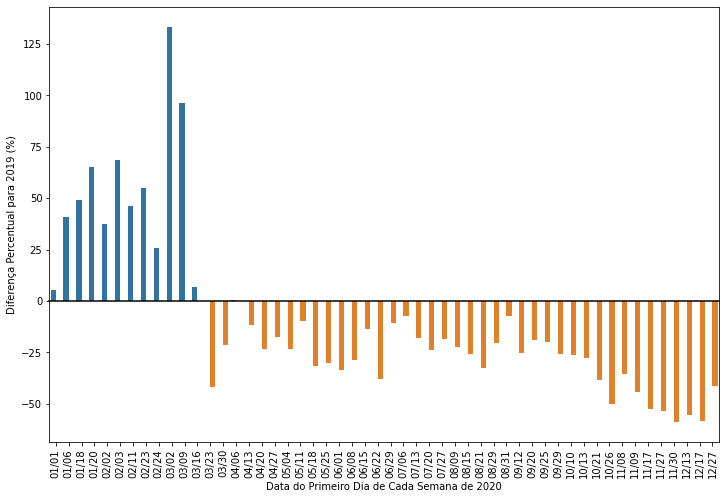

In [ ]:
plt.figure(figsize=(12,8))

colors = [0 if c >= 0 else 1 for c in diff_week['pct_diff (%)']]

sns.barplot(x = 'first_day_week', y = 'pct_diff (%)',  data = diff_week, hue = colors)
plt.axhline(0, color="k", clip_on=False)
plt.ylabel('Diferença Percentual para 2019 (%)')
plt.xlabel('Data do Primeiro Dia de Cada Semana de 2020')

plt.legend().remove()

plt.xticks(rotation = 90)

plt.show()

#plt.savefig('files/pct_diff_oct.png', bbox_inches = 'tight')

###Série temporal do número de viagens por semana (2019 e 2020)

In [ ]:
# Agrega o número de viagens por dia 
cb_end_19_gd = df_2019[['date_end','ntrips']].groupby('date_end',as_index = False).agg({'ntrips': 'sum'})
cb_end_20_gd = df_2020[['date_end','ntrips']].groupby('date_end',as_index = False).agg({'ntrips': 'sum'})

2019

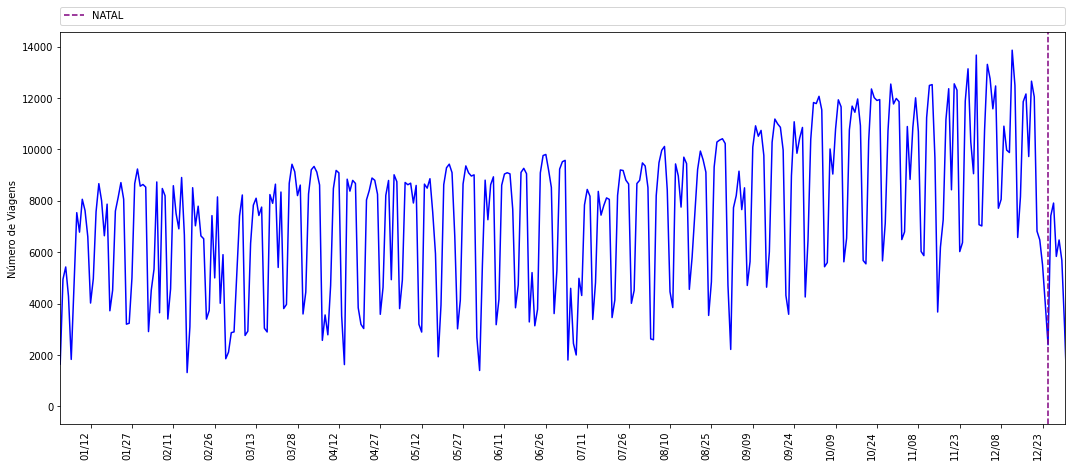

In [ ]:
  # 2019

sns.set_palette('colorblind')
f, axes = plt.subplots(figsize=(18,8),sharex=True)

ax = sns.lineplot(x = pd.to_datetime(cb_end_19_gd['date_end']), y = 'ntrips', data = cb_end_19_gd,color='b')
ax.axvline(x=pd.to_datetime('12/25/2019'),color='purple', linestyle='dashed',label = 'NATAL')


ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
ax.set_ylabel('Número de Viagens')
ax.set_xlabel('')

ax.set(xlim=[pd.to_datetime("01/01/2019"), pd.to_datetime("12/31/2019")])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()


plt.xticks(rotation = 'vertical')

plt.show()

2020

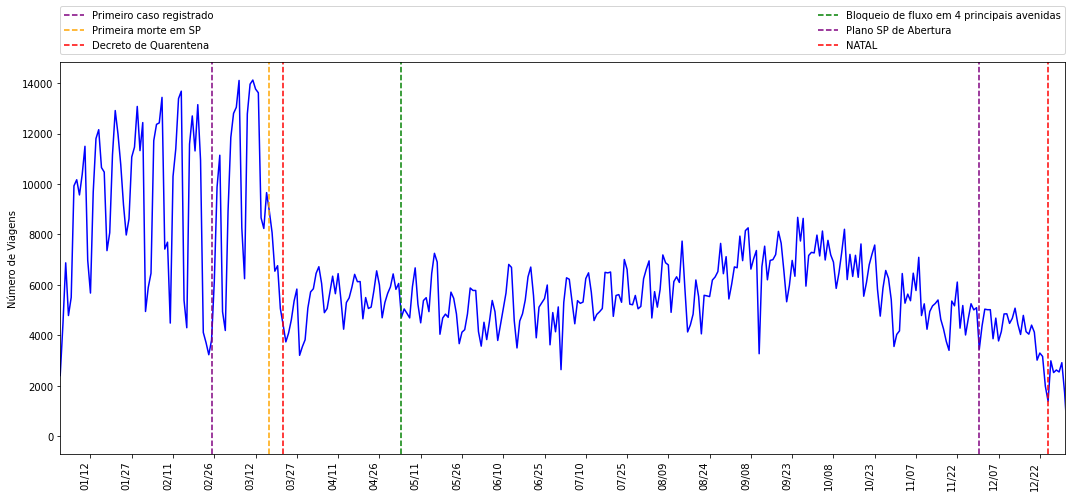

In [ ]:
  # 2020

sns.set_palette('colorblind')
f, axes = plt.subplots(figsize=(18,8),sharex=True)

ax = sns.lineplot(x = pd.to_datetime(cb_end_20_gd['date_end']), y = 'ntrips', data = cb_end_20_gd,color='b')

  # Histórico COVID em São Paulo:

ax.axvline(x=pd.to_datetime('02/25/2020'),color='purple', linestyle='dashed',label = 'Primeiro caso registrado')
ax.axvline(x=pd.to_datetime('03/17/2020'),color='orange', linestyle='dashed',label = 'Primeira morte em SP')
ax.axvline(x=pd.to_datetime('03/22/2020'),color='red', linestyle='dashed',label = 'Decreto de Quarentena')
ax.axvline(x=pd.to_datetime('05/04/2020'),color='green', linestyle='dashed',label = 'Bloqueio de fluxo em 4 principais avenidas')
ax.axvline(x=pd.to_datetime('11/30/2020'),color='purple', linestyle='dashed',label = 'Plano SP de Abertura')
ax.axvline(x=pd.to_datetime('12/25/2020'),color='red', linestyle='dashed',label = 'NATAL')


ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
ax.set_ylabel('Número de Viagens')
ax.set_xlabel('')

ax.set(xlim=[pd.to_datetime("01/01/2020"), pd.to_datetime("12/31/2020")])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()

plt.xticks(rotation = 'vertical')

plt.show()

###Distribuição de duração de viagens

In [ ]:
df_2019_antes = df_2019[df_2019['stoptime']<'03/01/2019']
df_2020_antes = df_2020[df_2020['stoptime']<'03/01/2020']

df_2019_depois = df_2019[(df_2019['stoptime']>='03/01/2019')&(df_2019['stoptime']<'01/01/2020')]
df_2020_depois = df_2020[(df_2020['stoptime']>='03/01/2020')&(df_2020['stoptime']<'01/01/2021')]

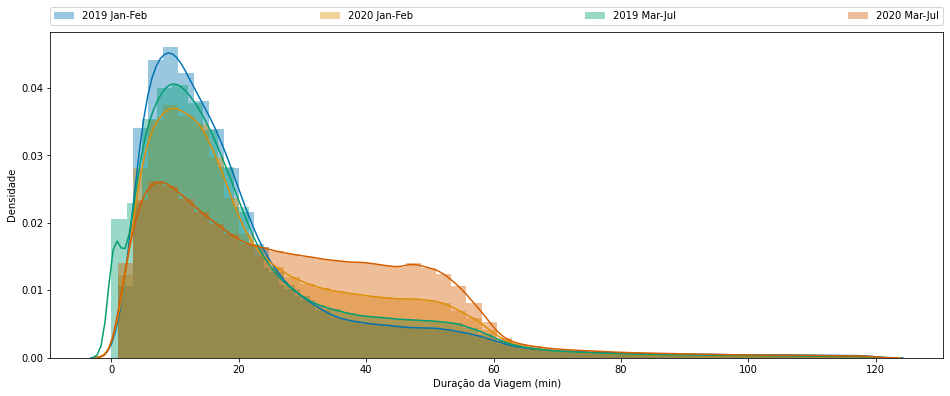

In [ ]:
f, axes = plt.subplots(figsize=(16,6))
sns.set_palette('colorblind')

ax1 = sns.distplot(df_2019_antes['duration_min'],label='2019 Jan-Feb')
ax = sns.distplot(df_2020_antes['duration_min'],label='2020 Jan-Feb')

ax2 = sns.distplot(df_2019_depois['duration_min'], label='2019 Mar-Jul')
ax3 = sns.distplot(df_2020_depois['duration_min'], label='2020 Mar-Jul')

# ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.)
ax3.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)

ax1.set_xlabel("Duração da Viagem (min)")
ax3.set_xlabel("Duração da Viagem (min)")

plt.ylabel('Densidade')

plt.show()

# plt.savefig('files/triplength_dist_all_120_v1_oct.jpeg', bbox_inches = 'tight')

In [ ]:
 pd.options.display.float_format = "{:,.2f}".format

# Resumo estatístico da distribuíção da duração das viagens
resumo = pd.DataFrame(data=[df_2019_antes['duration_min'].describe(),df_2020_antes['duration_min'].describe(),
                  df_2019_depois['duration_min'].describe(),df_2020_depois['duration_min'].describe()]
             ,index=['2019 Antes','2020 Antes','2019 Depois','2020 Depois'])
resumo.columns = ['amostra','média','erro padrão','min','25%','50%','75%','max']
resumo

,amostra,média,erro padrão,min,25%,50%,75%,max
2019 Antes,"364,037.00",20.65,18.16,1.02,9.00,14.97,24.80,119.98
2020 Antes,"542,305.00",23.57,18.19,1.02,10.03,17.38,33.87,119.98
2019 Depois,"2,381,544.00",20.75,18.03,0.00,8.73,15.17,26.58,119.98
2020 Depois,"1,774,476.00",28.76,19.87,1.02,12.13,25.48,42.53,119.98


In [ ]:
# Teste KS para comparar as distribuições
print('Teste KS antes: {}'.format(stats.ks_2samp(df_2019_antes['duration_min'], df_2020_antes['duration_min'])))
print('Teste KS depois: {}'.format(stats.ks_2samp(df_2019_depois['duration_min'], df_2020_depois['duration_min'])))


print('Teste Anderson-Darling antes: {}'.format(stats.anderson_ksamp([df_2019_antes['duration_min'], 
                                                               df_2020_antes['duration_min']])))
print('Teste Anderson-Darling depois: {}'.format(stats.anderson_ksamp([df_2019_depois['duration_min'], 
                                                                df_2020_depois['duration_min']])))

Teste KS antes: Ks_2sampResult(statistic=0.10654659715211534, pvalue=0.0)
Teste KS depois: Ks_2sampResult(statistic=0.24098943907361442, pvalue=0.0)
Teste Anderson-Darling antes: Anderson_ksampResult(statistic=5980.029348264927, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Teste Anderson-Darling depois: Anderson_ksampResult(statistic=143413.22602049407, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


###Top 5 estações nos 3 meses iniciais da pandemia

In [ ]:
# Agrega o número de viagens por mês 
cb_end_19_gm_antes = df_2019_antes[['month_end','ntrips','end station id']].groupby(['month_end','end station id'],
                                                                          as_index = False).agg({'ntrips': 'sum'})
cb_end_20_gm_antes = df_2020_antes[['month_end','ntrips','end station id']].groupby(['month_end','end station id'],
                                                                          as_index = False).agg({'ntrips': 'sum'})

cb_end_19_gm_depois = df_2019_depois[['month_end','ntrips','end station id']].groupby(['month_end','end station id'],
                                                                          as_index = False).agg({'ntrips': 'sum'})
cb_end_20_gm_depois = df_2020_depois[['month_end','ntrips','end station id']].groupby(['month_end','end station id'],
                                                                          as_index = False).agg({'ntrips': 'sum'})

In [ ]:
def getTopStations(data):
    topStations = []
    for month in data['month_end'].unique():
        top = data[data['month_end']==month].sort_values(by='ntrips',ascending=False).head()
        topStations.append(top)
    return topStations

In [ ]:
top_19_antes = getTopStations(cb_end_19_gm_antes)
top_20_antes = getTopStations(cb_end_20_gm_antes)

top_19_depois = getTopStations(cb_end_19_gm_depois)
top_20_depois = getTopStations(cb_end_20_gm_depois)

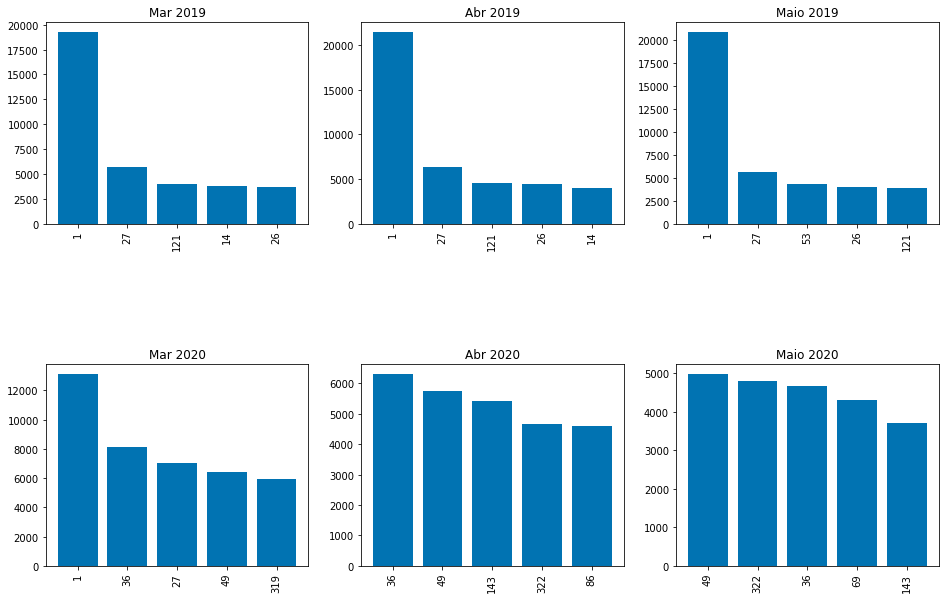

In [ ]:
f, axes = plt.subplots(2,3,figsize=(16,10))
plt.subplots_adjust(hspace=0.7)

axes[0,0].bar(top_19_depois[0]['end station id'],
            top_19_depois[0]['ntrips'])
axes[0,0].set_title('Mar 2019')
plt.setp(axes[0,0].get_xticklabels(), rotation=90)

axes[0,1].bar(top_19_depois[1]['end station id'],
            top_19_depois[1]['ntrips'])
axes[0,1].set_title('Abr 2019')
plt.setp(axes[0,1].get_xticklabels(), rotation=90)

axes[0,2].bar(top_19_depois[3]['end station id'],
            top_19_depois[3]['ntrips'])
axes[0,2].set_title('Maio 2019')
plt.setp(axes[0,2].get_xticklabels(), rotation=90)

axes[1,0].bar(top_20_depois[0]['end station id'],
            top_20_depois[0]['ntrips'])
axes[1,0].set_title('Mar 2020')
plt.setp(axes[1,0].get_xticklabels(), rotation=90)

axes[1,1].bar(top_20_depois[1]['end station id'],
            top_20_depois[1]['ntrips'])
axes[1,1].set_title('Abr 2020')
plt.setp(axes[1,1].get_xticklabels(), rotation=90)

axes[1,2].bar(top_20_depois[3]['end station id'],
            top_20_depois[3]['ntrips'])
axes[1,2].set_title('Maio 2020')
plt.setp(axes[1,2].get_xticklabels(), rotation=90)


plt.show()

In [ ]:
df_2020['end station id'].unique()

array(['67', '322', '177', '78', '205', '69', '19', '121', '129', '226',
       '337', '229', '199', '157', '204', '49', '303', '308', '35', '305',
       '1010', '20', '89', '209', '28', '152', '354', '215', '95', '202',
       '293', '295', '198', '91', '113', '299', '233', '294', '196',
       '135', '1008', '128', '169', '336', '167', '80', '181', '224',
       '189', '321', '13', '332', '53', '317', '37', '127', '263', '63',
       '329', '119', '325', '7', '17', '264', '14', '30', '1', '174',
       '358', '131', '23', '206', '100', '347', '42', '310', '187', '132',
       '44', '51', '176', '68', '22', '71', '297', '31', '21', '43', '86',
       '192', '268', '178', '194', '231', '107', '292', '146', '76', '4',
       '25', '262', '109', '211', '115', '236', '87', '319', '98', '122',
       '133', '149', '334', '151', '240', '124', '307', '359', '230',
       '137', '77', '108', '6', '216', '140', '32', '36', '327', '93',
       '172', '118', '59', '141', '261', '183', '313', '2

In [ ]:
top_20_antes[0]['end station id']

1        1
146     27
210     36
222     49
175    319
Name: end station id, dtype: object

In [ ]:
top_20_depois[0]['end station id']

0        1
210     36
153     27
221     49
180    319
Name: end station id, dtype: object

In [ ]:
top_19_antes[0]['end station id']

0        1
106     27
98      26
31     131
175      6
Name: end station id, dtype: object

In [ ]:
top_19_depois[0]['end station id']

0        1
109     27
24     121
39      14
101     26
Name: end station id, dtype: object

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745590 entries, 0 to 2784924
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   trip_id               object        
 1   tripduration          int64         
 2   initial_station_name  object        
 3   starttime             datetime64[ns]
 4   final_station_name    object        
 5   stoptime              datetime64[ns]
 6   birth_year            float64       
 7   gender                object        
 8   start station name    object        
 9   end station name      object        
 10  start station id      object        
 11  end station id        object        
 12  duration_min          float64       
 13  week_start            int64         
 14  week_end              int64         
 15  month_start           int64         
 16  month_end             int64         
 17  date_start            object        
 18  date_end              object        
 19  

In [ ]:
df_2020.tail()

,trip_id,tripduration,initial_station_name,starttime,final_station_name,stoptime,birth_year,start station latitude,start station longitude,end station latitude,end station longitude,start station name,end station name,start station id,end station id,duration_min,week_start,week_end,month_start,month_end,date_start,date_end,ntrips
2355975,8988395BikeSampa,2227,4 - Rua Diogo Moreira,2020-12-15 21:46:43,11 - Praça Faria Lima,2020-12-15 22:23:50,1974-01-01 00:00:00,-23.57,-46.69,-23.57,-46.69,Rua Diogo Moreira,Praça Faria Lima,4,11,37.12,51,51,12,12,12/15/2020,12/15/2020,1
2355976,8984649BikeSampa,3208,21 - Parque do Povo portão 1,2020-12-15 11:41:45,35 - Rua Benedito Lapin,2020-12-15 12:35:13,1974-01-01 00:00:00,-23.59,-46.69,-23.59,-46.67,Parque do Povo portão 1,Rua Benedito Lapin,21,35,53.47,51,51,12,12,12/15/2020,12/15/2020,1
2355977,8988196BikeSampa,3171,6 - Rua Manduri,2020-12-15 20:53:11,4 - Rua Diogo Moreira,2020-12-15 21:46:02,1974-01-01 00:00:00,-23.57,-46.69,-23.57,-46.69,Rua Manduri,Rua Diogo Moreira,6,4,52.85,51,51,12,12,12/15/2020,12/15/2020,1
2355978,8978285BikeSampa,175,22 - Rua Leopoldo Couto,2020-12-14 14:48:59,140 - JK Iguatemi,2020-12-14 14:51:54,1974-01-01 00:00:00,-23.59,-46.68,-23.59,-46.69,Rua Leopoldo Couto,JK Iguatemi,22,140,2.92,51,51,12,12,12/14/2020,12/14/2020,1
2355979,9051225BikeSampa,5556,42 - Hotel Unique,2020-12-26 13:50:38,42 - Hotel Unique,2020-12-26 15:23:14,1986-01-01 00:00:00,-23.58,-46.67,-23.58,-46.67,Hotel Unique,Hotel Unique,42,42,92.60,52,52,12,12,12/26/2020,12/26/2020,1


###Índice de Isolamento Social em 2020

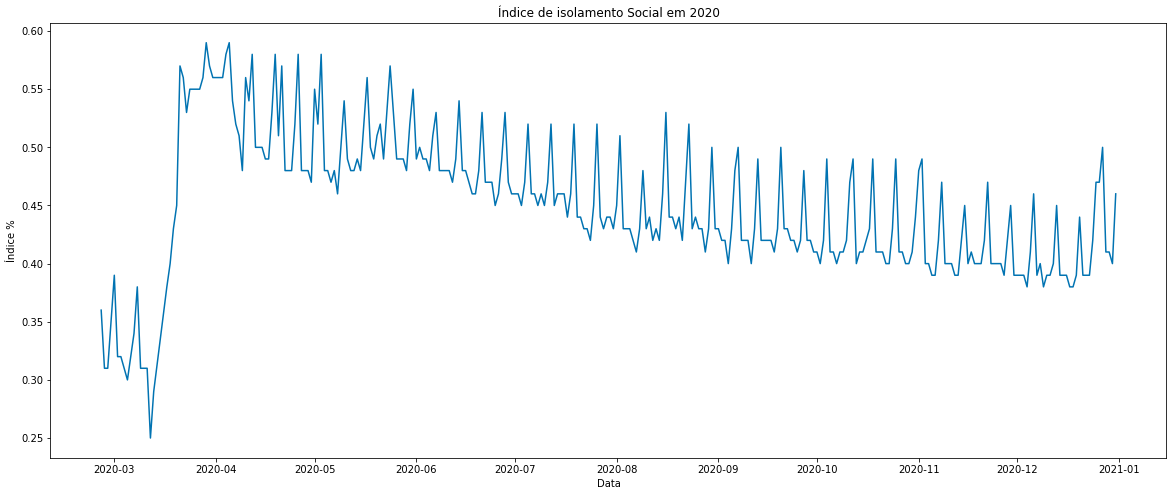

In [ ]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

covid = pd.read_excel("/content/drive/MyDrive/TBSP_2019_2020/Índice de Isolamento SP (2020).xlsx")

plt.figure(figsize=(20,8))

plt.title('Índice de isolamento Social em 2020')
plt.ylabel('Índice %')
plt.xlabel('Data')
x = covid['Data_Ano']
y = covid['Índice_Isolamento']
z = covid['Data_Semana']
plt.plot(x, y)

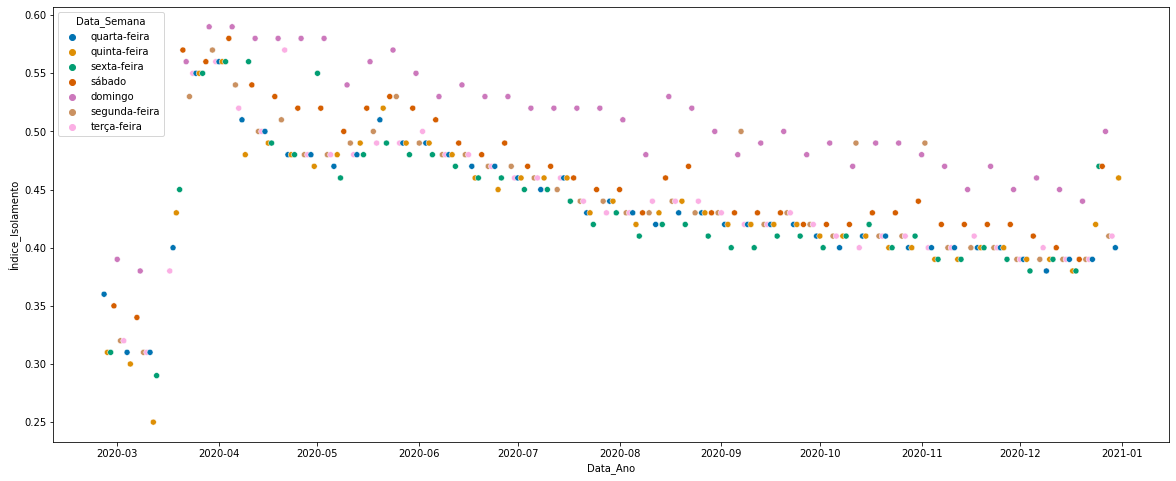

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=covid['Data_Ano'],y=covid['Índice_Isolamento'], hue=covid['Data_Semana'])

##Origins Stations

In [ ]:
df_2020

,trip_id,tripduration,initial_station_name,starttime,final_station_name,stoptime,birth_year,start station latitude,start station longitude,end station latitude,end station longitude,start station name,end station name,start station id,end station id,duration_min,week_start,week_end,month_start,month_end,date_start,date_end,ntrips
0,5882287BikeSampa,382,217 - Alameda Gabriel,2020-01-01 00:19:14,67 - Maestro Chiafarelli,2020-01-01 00:25:36,"1,980.00",nan,nan,nan,nan,Alameda Gabriel,Maestro Chiafarelli,217,67,6.37,1,1,1,1,01/01/2020,01/01/2020,1
1,5882289BikeSampa,1937,78 - Alameda Franca,2020-01-01 00:24:20,322 - Metrô Eucaliptos,2020-01-01 00:56:37,"1,993.00",nan,nan,nan,nan,Alameda Franca,Metrô Eucaliptos,78,322,32.28,1,1,1,1,01/01/2020,01/01/2020,1
2,5882288BikeSampa,1074,100 - Itaú Cultural,2020-01-01 00:24:35,177 - AV. Sao joão,2020-01-01 00:42:29,"1,987.00",nan,nan,nan,nan,Itaú Cultural,AV. Sao joão,100,177,17.90,1,1,1,1,01/01/2020,01/01/2020,1
3,5882290BikeSampa,117,78 - Alameda Franca,2020-01-01 00:24:44,78 - Alameda Franca,2020-01-01 00:26:41,"1,993.00",nan,nan,nan,nan,Alameda Franca,Alameda Franca,78,78,1.95,1,1,1,1,01/01/2020,01/01/2020,1
4,5882291BikeSampa,1794,78 - Alameda Franca,2020-01-01 00:27:01,322 - Metrô Eucaliptos,2020-01-01 00:56:55,"1,993.00",nan,nan,nan,nan,Alameda Franca,Metrô Eucaliptos,78,322,29.90,1,1,1,1,01/01/2020,01/01/2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355975,8988395BikeSampa,2227,4 - Rua Diogo Moreira,2020-12-15 21:46:43,11 - Praça Faria Lima,2020-12-15 22:23:50,1974-01-01 00:00:00,-23.57,-46.69,-23.57,-46.69,Rua Diogo Moreira,Praça Faria Lima,4,11,37.12,51,51,12,12,12/15/2020,12/15/2020,1
2355976,8984649BikeSampa,3208,21 - Parque do Povo portão 1,2020-12-15 11:41:45,35 - Rua Benedito Lapin,2020-12-15 12:35:13,1974-01-01 00:00:00,-23.59,-46.69,-23.59,-46.67,Parque do Povo portão 1,Rua Benedito Lapin,21,35,53.47,51,51,12,12,12/15/2020,12/15/2020,1
2355977,8988196BikeSampa,3171,6 - Rua Manduri,2020-12-15 20:53:11,4 - Rua Diogo Moreira,2020-12-15 21:46:02,1974-01-01 00:00:00,-23.57,-46.69,-23.57,-46.69,Rua Manduri,Rua Diogo Moreira,6,4,52.85,51,51,12,12,12/15/2020,12/15/2020,1
2355978,8978285BikeSampa,175,22 - Rua Leopoldo Couto,2020-12-14 14:48:59,140 - JK Iguatemi,2020-12-14 14:51:54,1974-01-01 00:00:00,-23.59,-46.68,-23.59,-46.69,Rua Leopoldo Couto,JK Iguatemi,22,140,2.92,51,51,12,12,12/14/2020,12/14/2020,1
